 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [66]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_csv_path = Path('../Starter_Code/Resources/whale_returns.csv')

In [3]:
algo_csv_path = Path('../Starter_Code/Resources/algo_returns.csv')

In [4]:
sptsx_csv_path = Path('../Starter_Code/Resources/sp_tsx_history.csv')

In [5]:
# Reading whale returns
whale_df= pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Insert shorts for each column
whale_df = whale_df.rename(columns={
    'SOROS FUND MANAGEMENT LLC'       :'SOROS',
    'PAULSON & CO.INC.'               :'PAULSON',
    'TIGER GLOBAL MANAGEMENT LLC'     :'TIGER GLOBAL',
    'BERKSHIRE HATHAWAY INC'          :'BERKSHIRE'
})
whale_df.head()

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL,BERKSHIRE
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_df.isnull().sum()

SOROS                 1
PAULSON & CO.INC.     1
TIGER GLOBAL          1
BERKSHIRE             1
dtype: int64

In [7]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL,BERKSHIRE
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_csv_path,  index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sptsx_df = pd.read_csv(sptsx_csv_path,  index_col="Date", parse_dates=True, infer_datetime_format=True)
sptsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
sptsx_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sptsx_df['Close'] = sptsx_df['Close'].str.replace('$','')
sptsx_df['Close']=sptsx_df['Close'].str.replace(',','')
sptsx_df['Close']= pd.to_numeric(sptsx_df['Close'])
sptsx_df.head()

C:\Users\makhl\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Calculate Daily Returns
sptsx_df.sort_index(axis='rows', ascending=True, inplace=True)
sptsx_df['TSX60 Returns'] = sptsx_df['Close'].pct_change()
sptsx_df.head()

,Close,TSX60 Returns
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305


In [15]:
# Drop nulls
sptsx_daily_returns = sptsx_df.dropna()
sptsx_daily_returns.head()

,Close,TSX60 Returns
Date,,
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
2012-10-09,12273.57,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_daily_returns.drop('Close', inplace=True, axis=1)
sptsx_daily_returns.head()

C:\Users\makhl\Anaconda3\envs\dev\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,TSX60 Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_daily_returns = pd.concat(
    [whale_df, algo_df, sptsx_daily_returns], axis='columns', join='inner')

portfolio_daily_returns

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL,BERKSHIRE,Algo 1,Algo 2,TSX60 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [18]:
portfolio_daily_returns.describe()

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL,BERKSHIRE,Algo 1,Algo 2,TSX60 Returns
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.000141,-0.000241,-0.000099,0.000377,0.000713,0.000208,0.000087
std,0.007828,0.006982,0.010883,0.012826,0.007589,0.008326,0.007034
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.031241
25%,-0.003662,-0.004038,-0.004784,-0.005725,-0.003139,-0.003892,-0.003668
50%,0.000529,0.000000,0.000295,0.000635,0.000143,0.000629,0.000587
75%,0.004330,0.003621,0.005324,0.007516,0.004038,0.005256,0.004237
max,0.029881,0.027032,0.080705,0.061341,0.050735,0.030509,0.029389


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

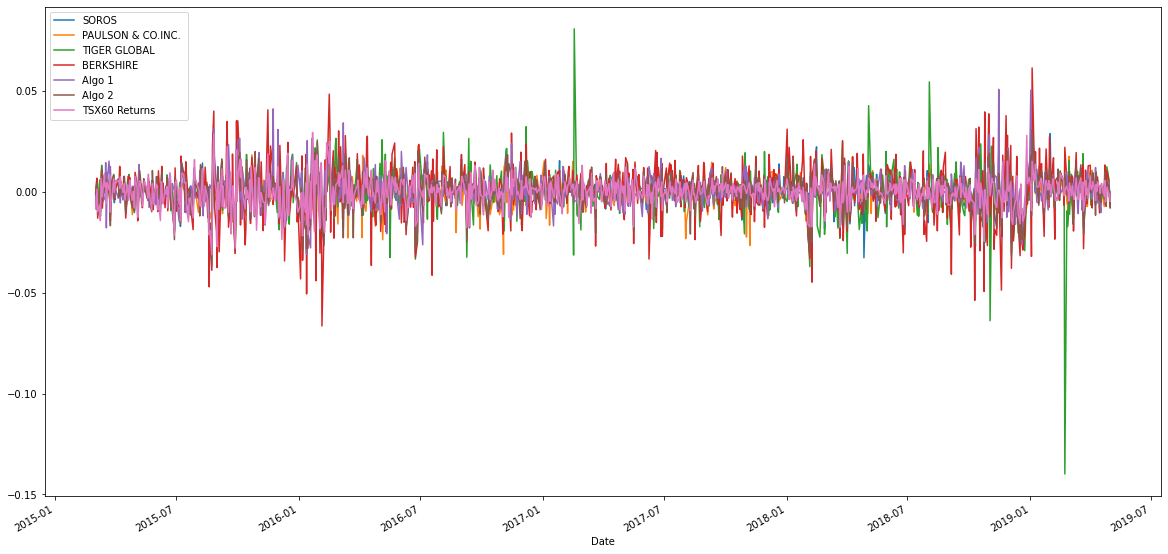

In [19]:
# Plot daily returns of all portfolios
portfolio_daily_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+portfolio_daily_returns).cumprod()
cumulative_returns.head()

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL,BERKSHIRE,Algo 1,Algo 2,TSX60 Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

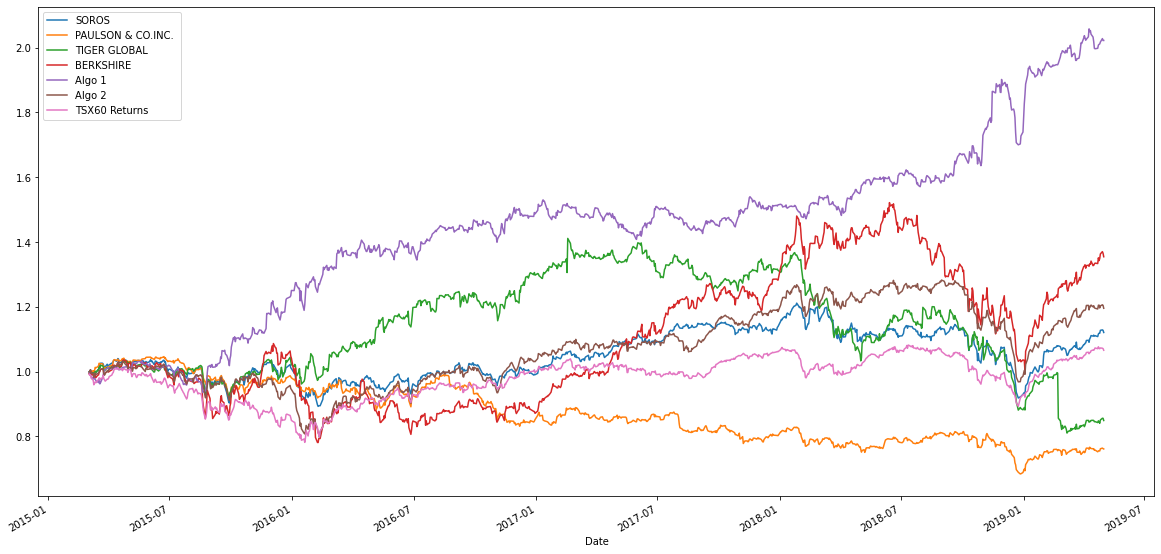

In [21]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

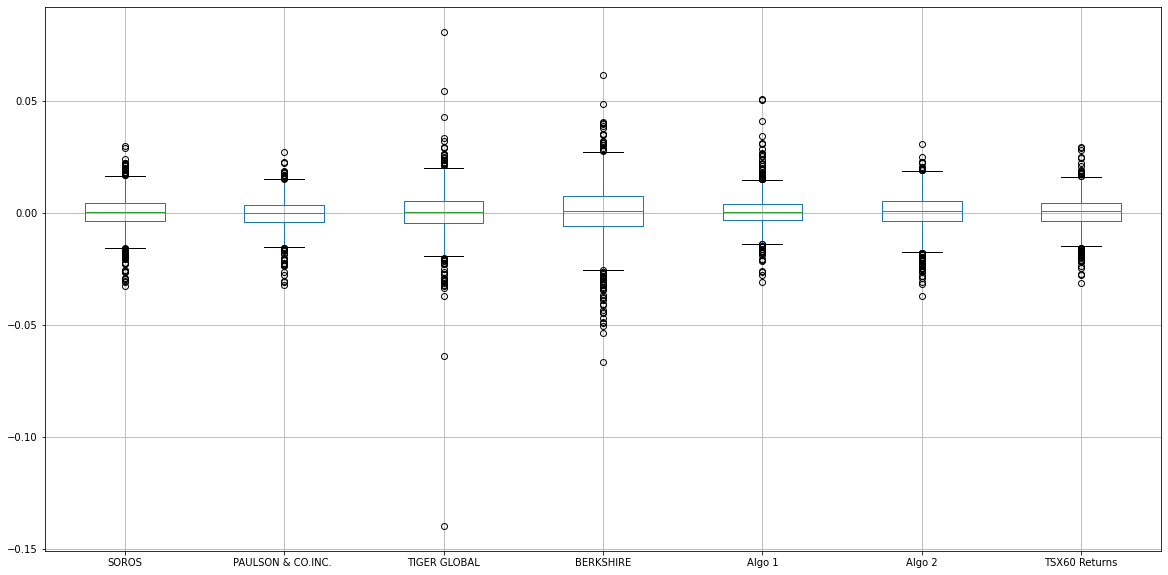

In [22]:
# Box plot to visually show risk
portfolio_daily_returns.boxplot(figsize=(20,10))

<AxesSubplot:>

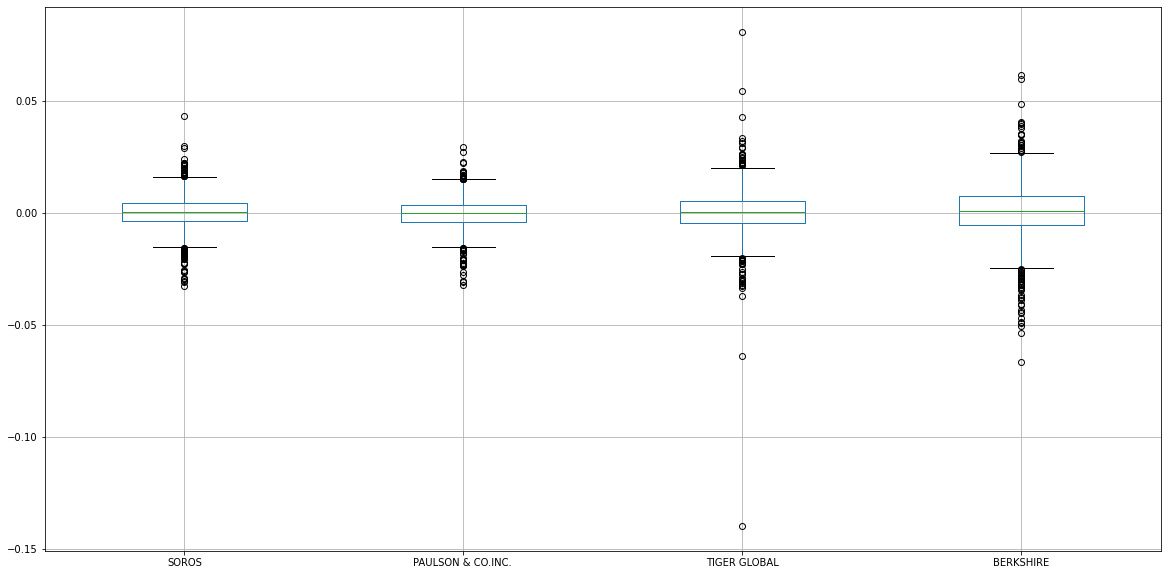

In [23]:
whale_df.boxplot(figsize=(20,10))

<AxesSubplot:>

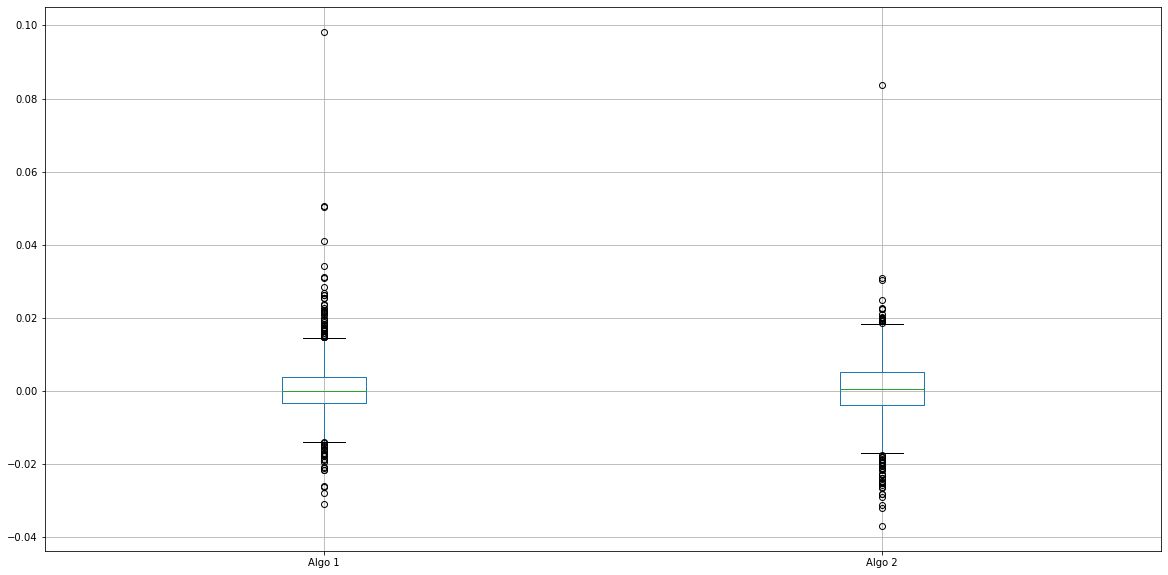

In [24]:
algo_df.boxplot(figsize=(20,10))

<AxesSubplot:>

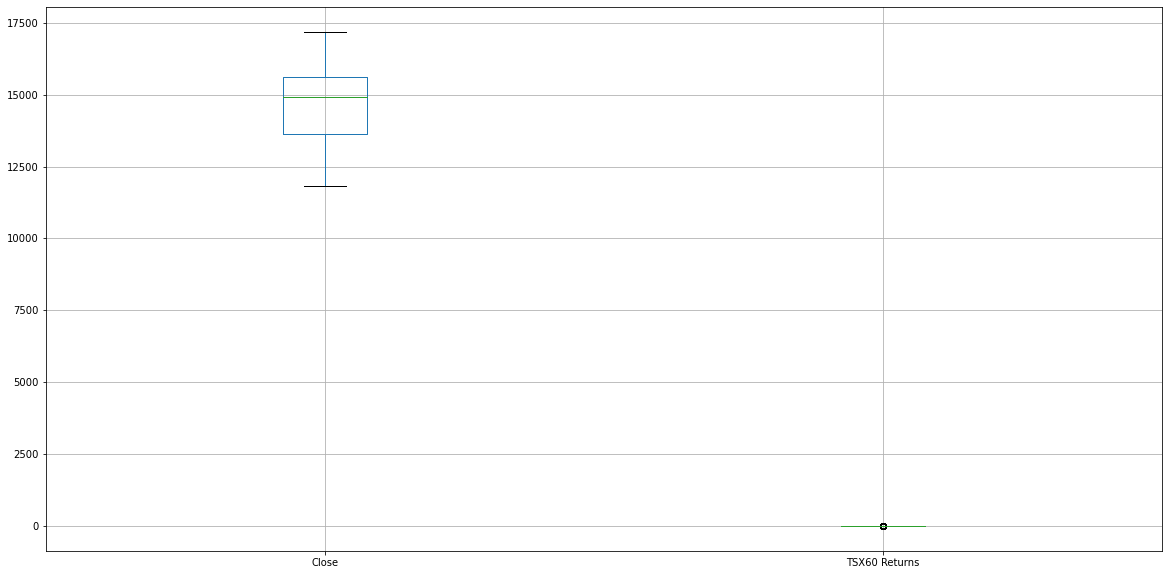

In [25]:
sptsx_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
stddev_returns= portfolio_daily_returns.std()
stddev_returns


SOROS                 0.007828
PAULSON & CO.INC.     0.006982
TIGER GLOBAL          0.010883
BERKSHIRE             0.012826
Algo 1                0.007589
Algo 2                0.008326
TSX60 Returns         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [27]:
#calculate daily standard deviations for S&P TSX 60
sptsx_stddev = stddev_returns['TSX60 Returns']
sptsx_stddev

0.007034167748577725

In [28]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = stddev_returns.sort_values(ascending=False)
daily_std

BERKSHIRE             0.012826
TIGER GLOBAL          0.010883
Algo 2                0.008326
SOROS                 0.007828
Algo 1                0.007589
TSX60 Returns         0.007034
PAULSON & CO.INC.     0.006982
dtype: float64

In [29]:
for stddev in stddev_returns.keys():
    if stddev_returns.get(stddev) > sptsx_stddev:
        print(f'{stddev} is riskier than TSX 60 Returns')
    if stddev_returns.get(stddev) < sptsx_stddev:
        print(f'{stddev} is least riskier than TSX 60 Returns')

SOROS is riskier than TSX 60 Returns
PAULSON & CO.INC.  is least riskier than TSX 60 Returns
TIGER GLOBAL is riskier than TSX 60 Returns
BERKSHIRE is riskier than TSX 60 Returns
Algo 1 is riskier than TSX 60 Returns
Algo 2 is riskier than TSX 60 Returns


### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

BERKSHIRE             0.203599
TIGER GLOBAL          0.172759
Algo 2                0.132177
SOROS                 0.124259
Algo 1                0.120470
TSX60 Returns         0.111664
PAULSON & CO.INC.     0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 day Rolling Standard Devealtion'}, xlabel='Date'>

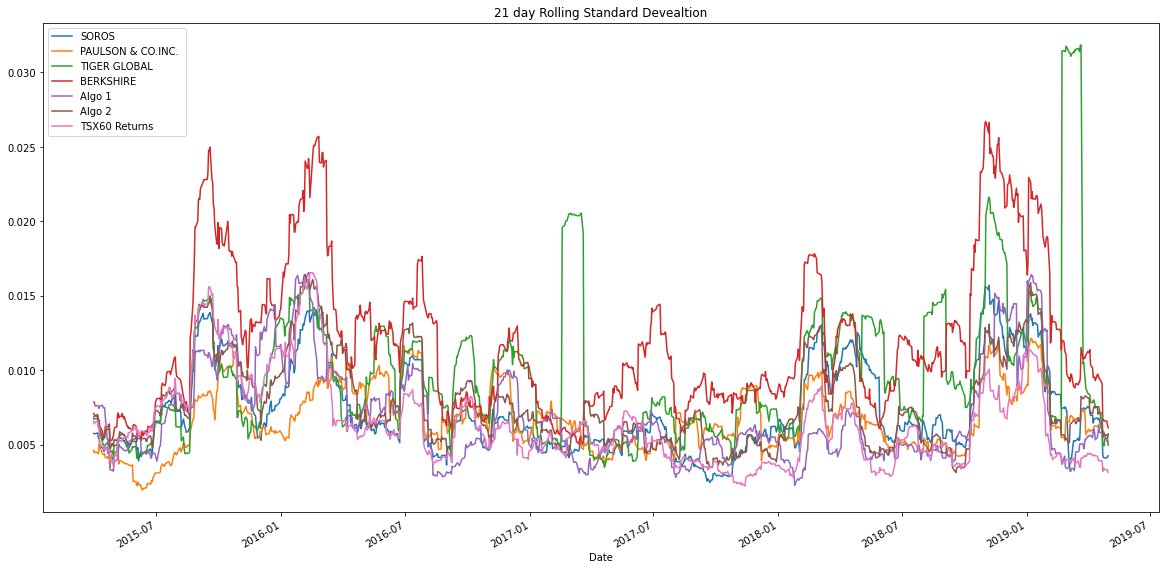

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_daily_returns.rolling(21).std()
rolling_std.dropna()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title=('21 day Rolling Standard Devealtion'))



### Calculate and plot the correlation

In [32]:
# Calculate the correlation
correlation_matrix = portfolio_daily_returns.corr()
# Display de correlation matrix
correlation_matrix

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL,BERKSHIRE,Algo 1,Algo 2,TSX60 Returns
SOROS,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX60 Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'21 Day Beta Trend'}, xlabel='Date'>

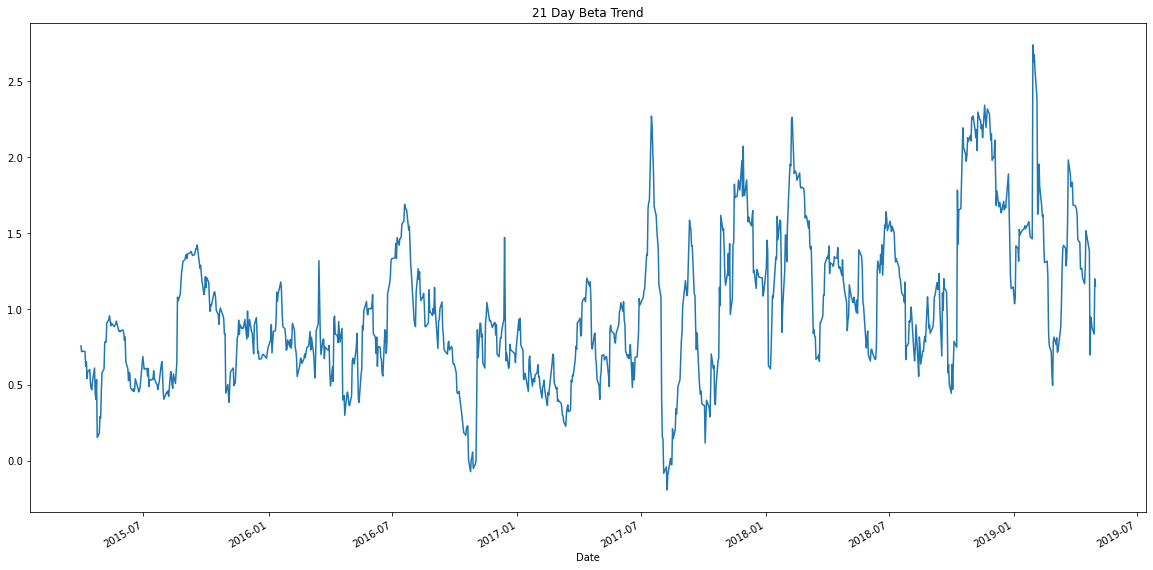

In [33]:
# Calculate covariance of a single portfolio
covariance = portfolio_daily_returns['BERKSHIRE'].cov(portfolio_daily_returns['TSX60 Returns'])
# Calculate variance of S&P TSX
variance = portfolio_daily_returns['TSX60 Returns'].var()
# Computing beta
beta = round((covariance / variance), 2)
beta
# calculate the rolling 21 days Beta
rolling_covariance = portfolio_daily_returns['BERKSHIRE'].rolling(21).cov(portfolio_daily_returns['TSX60 Returns'])
rolling_variance = portfolio_daily_returns['TSX60 Returns'].rolling(21).var()
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20,10), title=('21 Day Beta Trend'))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

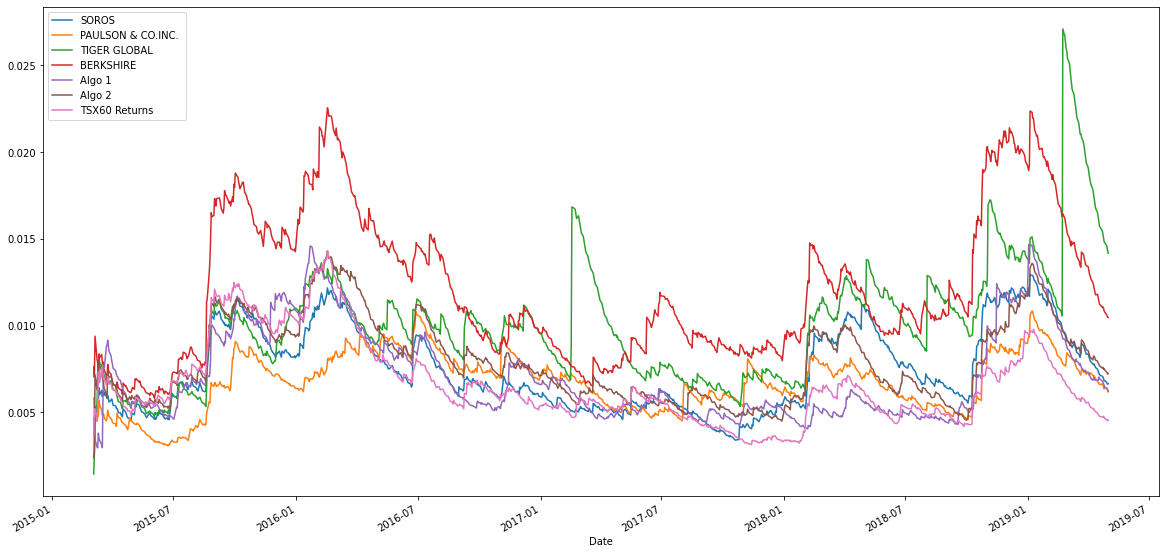

In [34]:
# Use `ewm` to calculate the rolling window
portfolio_daily_returns_ewm = portfolio_daily_returns.ewm(halflife=21).std()
portfolio_daily_returns_ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
#calculate rf rate
rf_rate = 0.0003
portfolio_daily_returns['rf_rate']= rf_rate
annual_sharp_ratio = ((portfolio_daily_returns.mean()-portfolio_daily_returns['rf_rate'].mean())* 252)/(portfolio_daily_returns.std() * np.sqrt(252))
annual_sharp_ratio

SOROS                -0.321698
PAULSON & CO.INC.    -1.229652
TIGER GLOBAL         -0.582059
BERKSHIRE             0.095727
Algo 1                0.863971
Algo 2               -0.175144
TSX60 Returns        -0.481481
rf_rate               0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

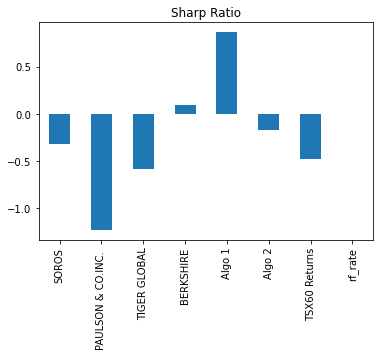

In [36]:
# Visualize the sharpe ratios as a bar plot
annual_sharp_ratio.plot(kind='bar', title= 'Sharp Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock
l_path = Path('../Starter_Code/Resources/l_historical.csv')
l_historical_df = pd.read_csv(l_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
symbol1= l_historical_df['Symbol'][0]

In [38]:
# Reading data from 2nd stock
otex_path = Path('../Starter_Code/Resources/otex_historical.csv')
otex_df = pd.read_csv(otex_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
symbol2= otex_df['Symbol'][0]

In [39]:
# Reading data from 3rd stock
SHOP_path = Path('../Starter_Code/Resources/shop_historical.csv')
SHOP_df = pd.read_csv(SHOP_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
symbol3= SHOP_df['Symbol'][0]

In [40]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat(
    [l_historical_df, otex_df, SHOP_df], axis='columns', join='inner')
combined_stocks.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [41]:
# Reset Date index
combined_stocks.sort_index(inplace=True)
combined_stocks

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,L,67.90,OTEX,58.68,SHOP,513.22
2019-12-23,L,67.68,OTEX,57.89,SHOP,511.62
2019-12-24,L,67.67,OTEX,57.44,SHOP,525.39


In [42]:
# Reorganize portfolio data by having a column per symbol
del combined_stocks['Symbol']
combined_stocks.columns = [symbol1, symbol2, symbol3]

In [43]:
# Calculate daily returns
combined_stocks['L_returns'] = combined_stocks['L'].pct_change()
combined_stocks['OTEX_returns'] = combined_stocks['OTEX'].pct_change()
combined_stocks['SHOP_returns'] = combined_stocks['SHOP'].pct_change()

# Drop NAs
combined_stocks.dropna()
# Display sample data
stock_returns = combined_stocks[['L_returns', 'OTEX_returns', 'SHOP_returns']]
stock_returns.sample(15)

,L_returns,OTEX_returns,SHOP_returns
Date,,,
2018-08-21,-0.000687,-0.005151,-0.018398
2019-03-11,0.002779,0.004568,0.055433
2019-08-07,0.006242,0.004774,0.026636
2019-07-10,0.003878,-0.002153,-0.013010
2019-12-17,-0.001729,-0.001388,-0.012698
2018-05-28,-0.006455,-0.007771,0.010215
2019-02-07,-0.000451,-0.006869,-0.001746
2018-09-10,-0.001221,0.000593,0.009388
2018-07-20,-0.003909,-0.005400,-0.010683


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_portfolio_returns = stock_returns.dot(weights)
# Display sample data
stock_portfolio_returns.sample(15)

Date
2019-02-19    0.004337
2018-11-07    0.030415
2019-01-25    0.008210
2019-07-17    0.007208
2018-01-12    0.004051
2018-07-23    0.003996
2018-09-05   -0.002778
2019-02-04    0.013742
2018-07-06    0.014645
2018-09-13    0.002958
2019-09-13   -0.016078
2018-07-19    0.008393
2019-12-24    0.006331
2018-08-29    0.002785
2019-05-21   -0.002465
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
port_returns = pd.DataFrame(stock_portfolio_returns)
port_returns.columns=['Stock Portfolio Returns']
all_returns = pd.concat([port_returns, stock_returns], axis='columns', join='inner') 

In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns.sample(15)

,Stock Portfolio Returns,L_returns,OTEX_returns,SHOP_returns
Date,,,,
2019-08-20,0.010785,-0.000553,-0.003489,0.036398
2018-05-11,-0.004245,-0.007669,0.004966,-0.010032
2018-09-13,0.002958,-0.008177,0.000000,0.017050
2019-03-20,-0.009011,-0.006756,-0.015478,-0.004800
2018-01-05,-0.003126,0.000000,-0.007924,-0.001455
2019-07-31,0.002331,0.002489,-0.008979,0.013484
2018-06-07,-0.015513,-0.017126,-0.004978,-0.024436
2019-11-18,0.013306,0.007319,0.000000,0.032600
2019-08-15,0.003458,0.006808,0.008991,-0.005425


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
annual_stddev= all_returns.std()*np.sqrt(252)
annual_stddev

Stock Portfolio Returns    0.216794
L_returns                  0.152369
OTEX_returns               0.215132
SHOP_returns               0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

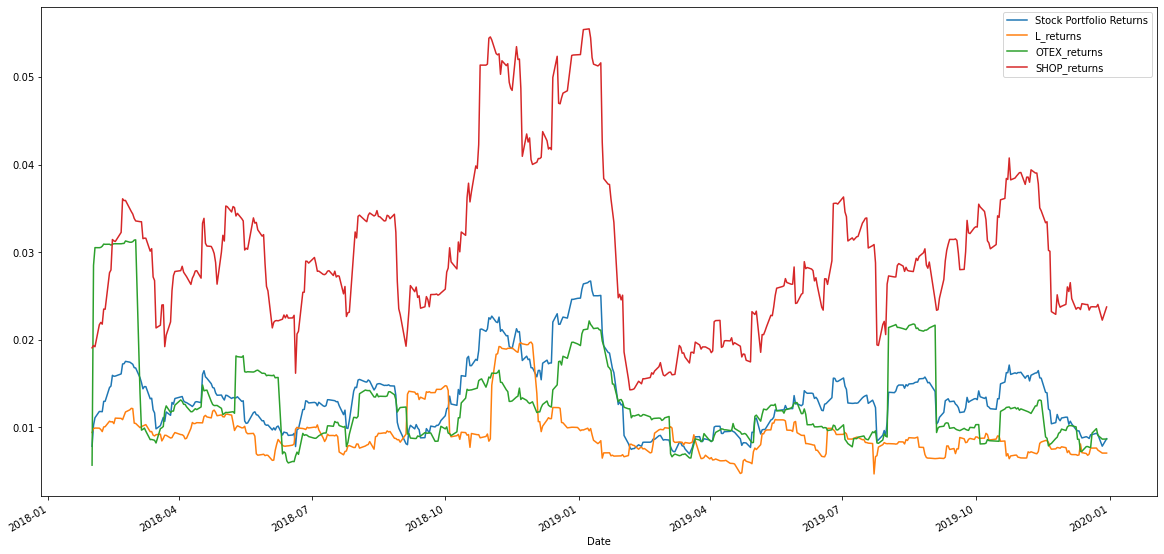

In [48]:
# Calculate rolling standard deviation
rolling_std2 = all_returns.rolling(21).std()
# Plot rolling standard deviation
rolling_std2.plot(figsize=(20,10))

### Calculate and plot the correlation

In [49]:
# Calculate and plot the correlation
price_correlation2 = all_returns.corr()
price_correlation2


,Stock Portfolio Returns,L_returns,OTEX_returns,SHOP_returns
Stock Portfolio Returns,1.000000,0.390044,0.672637,0.913094
L_returns,0.390044,1.000000,0.181266,0.127501
OTEX_returns,0.672637,0.181266,1.000000,0.398427
SHOP_returns,0.913094,0.127501,0.398427,1.000000


<AxesSubplot:>

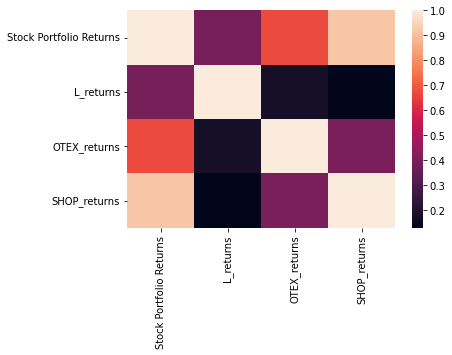

In [50]:
sns.heatmap(price_correlation2)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'60 Day Beta Trend'}, xlabel='Date'>

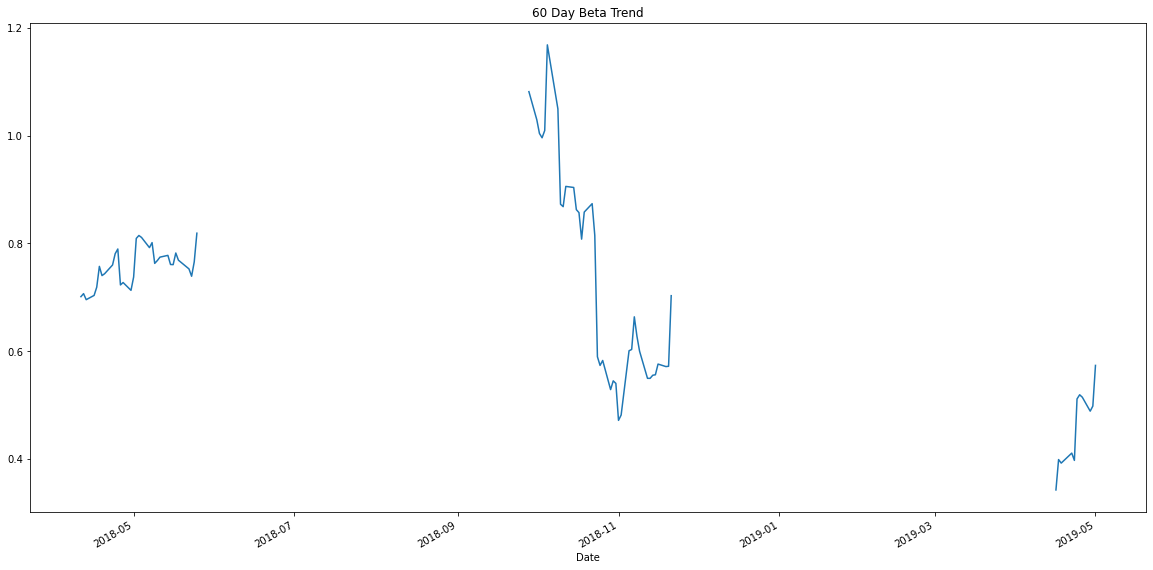

In [65]:
# Calculate and plot Beta
port_analysis = pd.concat([all_returns, portfolio_daily_returns], axis='columns', join='inner')
rolling_covariance = all_returns['L_returns'].rolling(60).cov(portfolio_daily_returns['TSX60 Returns'])
rolling_variance = portfolio_daily_returns['TSX60 Returns'].rolling(60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize=(20,10), title=('60 Day Beta Trend'))

In [61]:
# Calculate Annualized Sharpe Ratios
rf_rate = 0.0003
all_returns['rf_rate']= rf_rate
annual_sharp_ratio = ((port_analysis.mean()-port_analysis['rf_rate'].mean())* 252)/(port_analysis.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Annual Sharp Ratios'}>

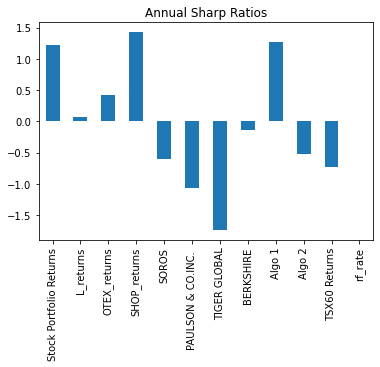

In [62]:
# Visualize the sharpe ratios as a bar plot
annual_sharp_ratio.plot(kind='bar', title='Annual Sharp Ratios')

### How does your portfolio do?

Write your answer here!

In [64]:
print('When looking at portfloios from a return, risk and sharp ratio aspect, my portfolio does way better than the S&P-TSX60. My portfolio  is entireley in the positive as pose to the market which sits in the negative. Thus making my portofolio the portfolio of choice to invest in.')

When looking at portfloios from a return, risk and sharp ratio aspect, my portfolio does way better than the S&P-TSX60. My portfolio  is entireley in the positive as pose to the market which sits in the negative. Thus making my portofolio the portfolio of choice to invest in.
